      n  avg_standard_error  avg_loss
0   100            0.022920    6201.0
1   200            0.016652   11863.5
2   300            0.013653   17820.0
3   500            0.010630   29461.5
4  1000            0.007490   60057.0
5  2000            0.005314  119317.5
6  5000            0.003356  300262.5


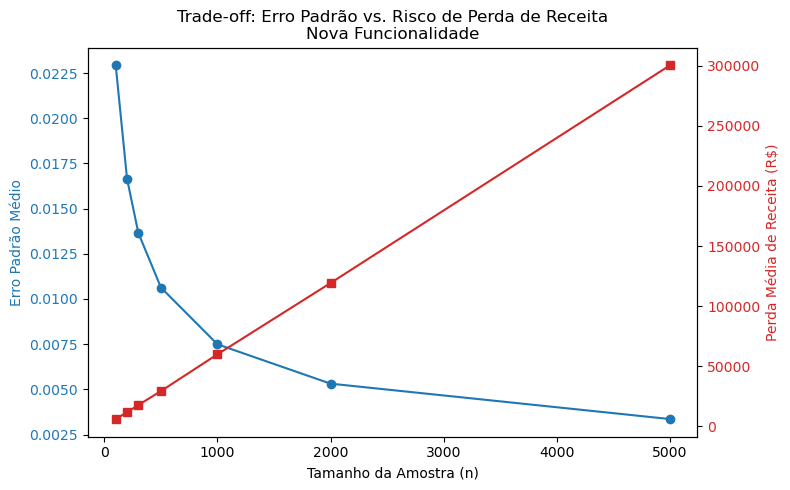

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parâmetros do cenário
p_base = 0.10   # Conversão baseline
p_new = 0.06    # Conversão esperada da nova funcionalidade
revenue_per_conversion = 1500  # Receita por conversão (R$)
# Faixa de tamanhos de amostra
n_list = [100, 200, 300, 500, 1000, 2000, 5000]
# Número de simulações para cada n
num_simulations = 1000

# Listas para armazenar resultados
results = {
    'n': [],
    'avg_standard_error': [],
    'avg_loss': []
}
np.random.seed(42)  # Reprodutibilidade

for n in n_list:
    se_list = []
    loss_list = []
    
    for _ in range(num_simulations):
        # Gera dados de conversão (Bernoulli com p = p_new)
        conversions = np.random.binomial(1, p_new, n)
        
        # Taxa de conversão observada na amostra
        p_hat = np.mean(conversions)
        
        # Erro padrão (aprox.) da taxa de conversão
        se = np.std(conversions)/np.sqrt(n)
        
        se_list.append(se)
        
        # Perda de receita na amostra:
        # baseline = n * p_base * revenue_per_conversion
        # new = n * p_hat * revenue_per_conversion
        # loss = baseline - new
        loss = (p_base - p_hat) * n * revenue_per_conversion
        loss_list.append(loss)
    
    # Calcula as médias ao longo das simulações
    avg_se = np.mean(se_list)
    avg_loss = np.mean(loss_list)
    
    # Armazena nos resultados
    results['n'].append(n)
    results['avg_standard_error'].append(avg_se)
    results['avg_loss'].append(avg_loss)
# Converte resultados em DataFrame
df_results = pd.DataFrame(results)
print(df_results)
# Visualização
fig, ax1 = plt.subplots(figsize=(8, 5))

color1 = 'tab:blue'
ax1.set_xlabel('Tamanho da Amostra (n)')
ax1.set_ylabel('Erro Padrão Médio', color=color1)
ax1.plot(df_results['n'], df_results['avg_standard_error'], marker='o', color=color1, label='Erro Padrão')
ax1.tick_params(axis='y', labelcolor=color1)

# Cria um segundo eixo Y para a perda de receita
ax2 = ax1.twinx()  
color2 = 'tab:red'
ax2.set_ylabel('Perda Média de Receita (R$)', color=color2)
ax2.plot(df_results['n'], df_results['avg_loss'], marker='s', color=color2, label='Perda de Receita')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Trade-off: Erro Padrão vs. Risco de Perda de Receita\nNova Funcionalidade')
fig.tight_layout()
plt.show()